In [1]:
import polars as pl

import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
import warnings

import pandas as pd

sns.set(font_scale = 2)

warnings.filterwarnings('ignore')
sql = pl.SQLContext()

In [2]:
df = pl.scan_csv('./result.csv')
sql.register("df", df)
df.collect()

datasetName,trainTestRatio,adjacencyMatrixThresholdValue,adjacencyMatrixLaplacianMatrix,inputLength,outputLength,modelName,modelConfig,maxEpoch,batchSize,learningRate,weightDecay,epoch,train_MAE,train_MSE,train_MAAPE,test_MAE,test_MSE,test_MAAPE,train_time,test_time,max_memory
str,f64,f64,str,i64,i64,str,str,i64,i64,f64,f64,i64,f64,f64,f64,f64,f64,f64,f64,f64,i64
"""Chickenpox""",0.7,0.0,"""cheb_poly""",8,10,"""ASTGCN""","""{""time_strides"": 1, ""nb_block""…",100,32,0.001,0.0005,0,37.442326,2565.883331,0.514035,28.77941,1501.719751,0.508647,1.125543,0.30525,76900352
"""Chickenpox""",0.7,0.0,"""cheb_poly""",8,10,"""ASTGCN""","""{""time_strides"": 1, ""nb_block""…",100,32,0.001,0.0005,1,31.393465,1852.072754,0.461061,26.17366,1242.825977,0.492619,0.707178,0.249555,76900352
"""Chickenpox""",0.7,0.0,"""cheb_poly""",8,10,"""ASTGCN""","""{""time_strides"": 1, ""nb_block""…",100,32,0.001,0.0005,2,30.299707,1742.752523,0.453048,24.513433,1181.57146,0.463497,0.751595,0.316789,76900352
"""Chickenpox""",0.7,0.0,"""cheb_poly""",8,10,"""ASTGCN""","""{""time_strides"": 1, ""nb_block""…",100,32,0.001,0.0005,3,29.344819,1671.840393,0.431229,24.502646,1152.510767,0.469698,0.783001,0.28943,76900352
"""Chickenpox""",0.7,0.0,"""cheb_poly""",8,10,"""ASTGCN""","""{""time_strides"": 1, ""nb_block""…",100,32,0.001,0.0005,4,28.858786,1600.515269,0.435027,25.214848,1172.172144,0.481001,0.767778,0.301336,76900352
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Uzel2022""",0.7,0.8,"""dual_rand_mat_asym""",15,15,"""GWNet""","""{""addaptadj"": true, ""gcn_bool""…",100,128,0.001,0.0005,95,0.051512,0.008244,0.151244,0.037433,0.004348,0.124151,1.415119,0.344381,6222586368
"""Uzel2022""",0.7,0.8,"""dual_rand_mat_asym""",15,15,"""GWNet""","""{""addaptadj"": true, ""gcn_bool""…",100,128,0.001,0.0005,96,0.051767,0.008207,0.155048,0.046807,0.005657,0.128104,1.419306,0.337443,6222586368
"""Uzel2022""",0.7,0.8,"""dual_rand_mat_asym""",15,15,"""GWNet""","""{""addaptadj"": true, ""gcn_bool""…",100,128,0.001,0.0005,97,0.051441,0.008095,0.153658,0.038813,0.004599,0.116783,1.40301,0.328207,6222586368


In [3]:
datasetNames = sql.execute(f"SELECT DISTINCT datasetName FROM df").collect().to_series().to_list()
modelNames = sql.execute(f"SELECT DISTINCT modelName FROM df").collect().to_series().to_list()

print(datasetNames)
print(modelNames)

['Chickenpox', 'JP-Pref', 'METR-LA', 'NOAA1000', 'PEMS-BAY', 'PEMS03', 'PEMS04', 'PEMS07', 'PEMS08', 'PEMSD7', 'US-Regions', 'US-States', 'Uzel2022']
['ASTGCN', 'DCRNN', 'GWNet', 'ARMA', 'GRU', 'LSTM', 'RNN', 'VAR', 'DSTAGNN', 'DGCRN', 'STGODE', 'AGCRN', 'TGCRN']


In [4]:
# reorder
modelNames = [
    'ARMA',
    'VAR',
    'RNN',
    'LSTM',
    'GRU',
    'ASTGCN',
    'DCRNN',
    'GWNet',
    'AGCRN',
    'DGCRN',
    'DSTAGNN',
    'STGODE',
    'TGCRN'
]

datasetNames= [
    'METR-LA',
    'PEMS-BAY',
    'PEMS03',
    'PEMS04',
    'PEMS07',
    'PEMS08',
    'PEMSD7',
    'NOAA1000',
    'Uzel2022',
    'Chickenpox',
    'JP-Pref',
    'US-Regions',
    'US-States',
]

In [5]:
def extract_data(sql: pl.SQLContext, target: str) -> pd.DataFrame:
    _YLABEL = 'datasetName'
    _XLABEL = 'modelName'

    query = f'SELECT {_YLABEL}, {_XLABEL}, '
    if target == 'test_MAAPE':
        query += f'AVG({target}) * 100.0 AS {target} '
    elif target == 'max_memory':
        query += f'MAX({target}) / (1024.0*1024.0*1024.0) as {target} '
    elif target == 'train_time':
        query += f'AVG({target}) as {target} '
    query += f'''
        FROM df
        GROUP BY {_YLABEL}, {_XLABEL}
    '''
        
    # Extract data (OLAP)
    df_result: pl.DataFrame = sql.execute(query).collect().pivot(index=_YLABEL, columns=_XLABEL, values=target)

    # reorder column
    df_result = df_result.select([_YLABEL] + modelNames)

    # Reorder row
    datasetNamesIndex = {v: i for i, v in enumerate(datasetNames)}
    datasetNamesNewOrder = {v: datasetNamesIndex[v] for _, v in enumerate(df_result[_YLABEL].to_list())}

    df_result = df_result.with_columns(
        pl.col(_YLABEL).map_elements(lambda x: datasetNamesNewOrder[x]).alias('index'))
    df_result = df_result.sort('index')
    df_result = df_result.drop('index')

    # Convert to pandas
    df_result = df_result.to_pandas().set_index(_YLABEL)

    return df_result

In [6]:
def draw_data(df: pd.DataFrame, vmin: float, vmax: float, logscale: bool = False, save_path: str = ''):
    assert vmin < vmax, 'vmin must be less than vmax'

    if logscale:
        EPSILON = 1
        if vmin < 1:
            vmin = EPSILON
        my_norm = matplotlib.colors.LogNorm(vmin=vmin, vmax=vmax)

    fig, ax = plt.subplots(1,1, figsize=(24, 8))
    sns.heatmap(
        df,
        ax=ax,
        vmin=vmin, vmax=vmax,
        annot=True,
        fmt=".2f",
        cmap="RdYlGn_r",
        linewidths=.1,
        norm=my_norm if logscale else None,
        cbar_kws={"shrink": .5, "pad": 0.015})

    #fig.suptitle('MAAPE loss comparison (%)')
    ax.set_xlabel('Model name')
    ax.set_ylabel('Dataset name')

    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top') 
    plt.xticks(rotation=0, ha='center')
    plt.tick_params(left = False, top=False) 

    fig.tight_layout()

    if len(save_path) > 0:
        fig.savefig(save_path, format="pdf", bbox_inches='tight')
    fig.show()

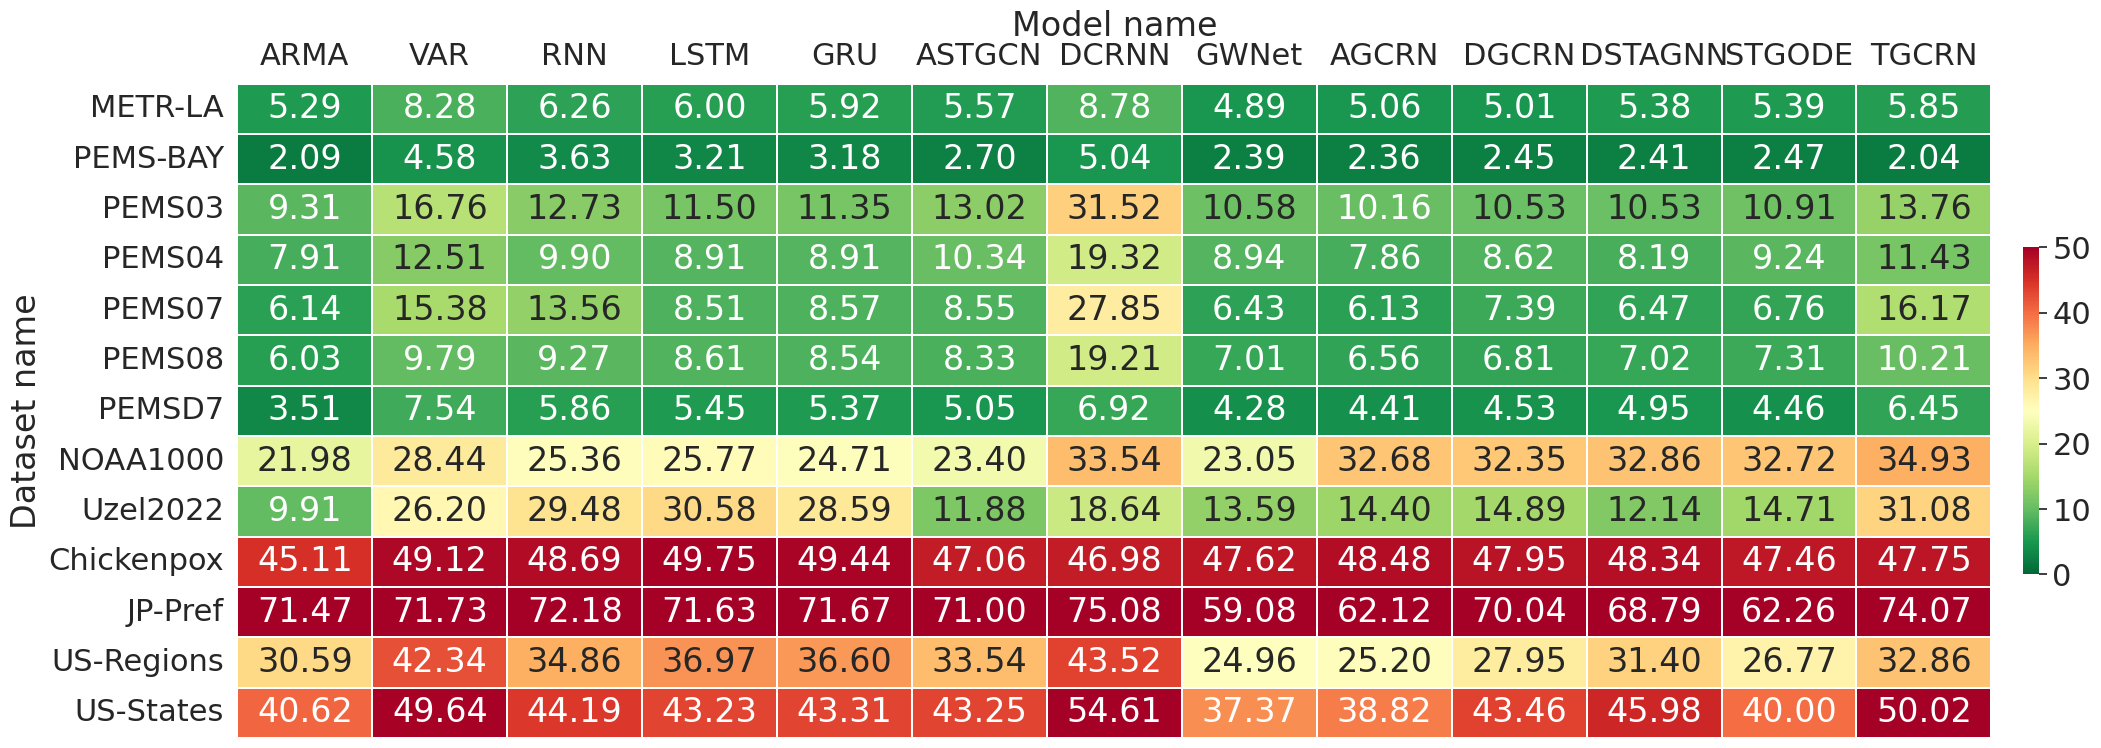

In [7]:
draw_data(extract_data(sql, 'test_MAAPE'), vmin=0, vmax=50, save_path='./figure/01-MAAPE_loss_comparison.pdf')

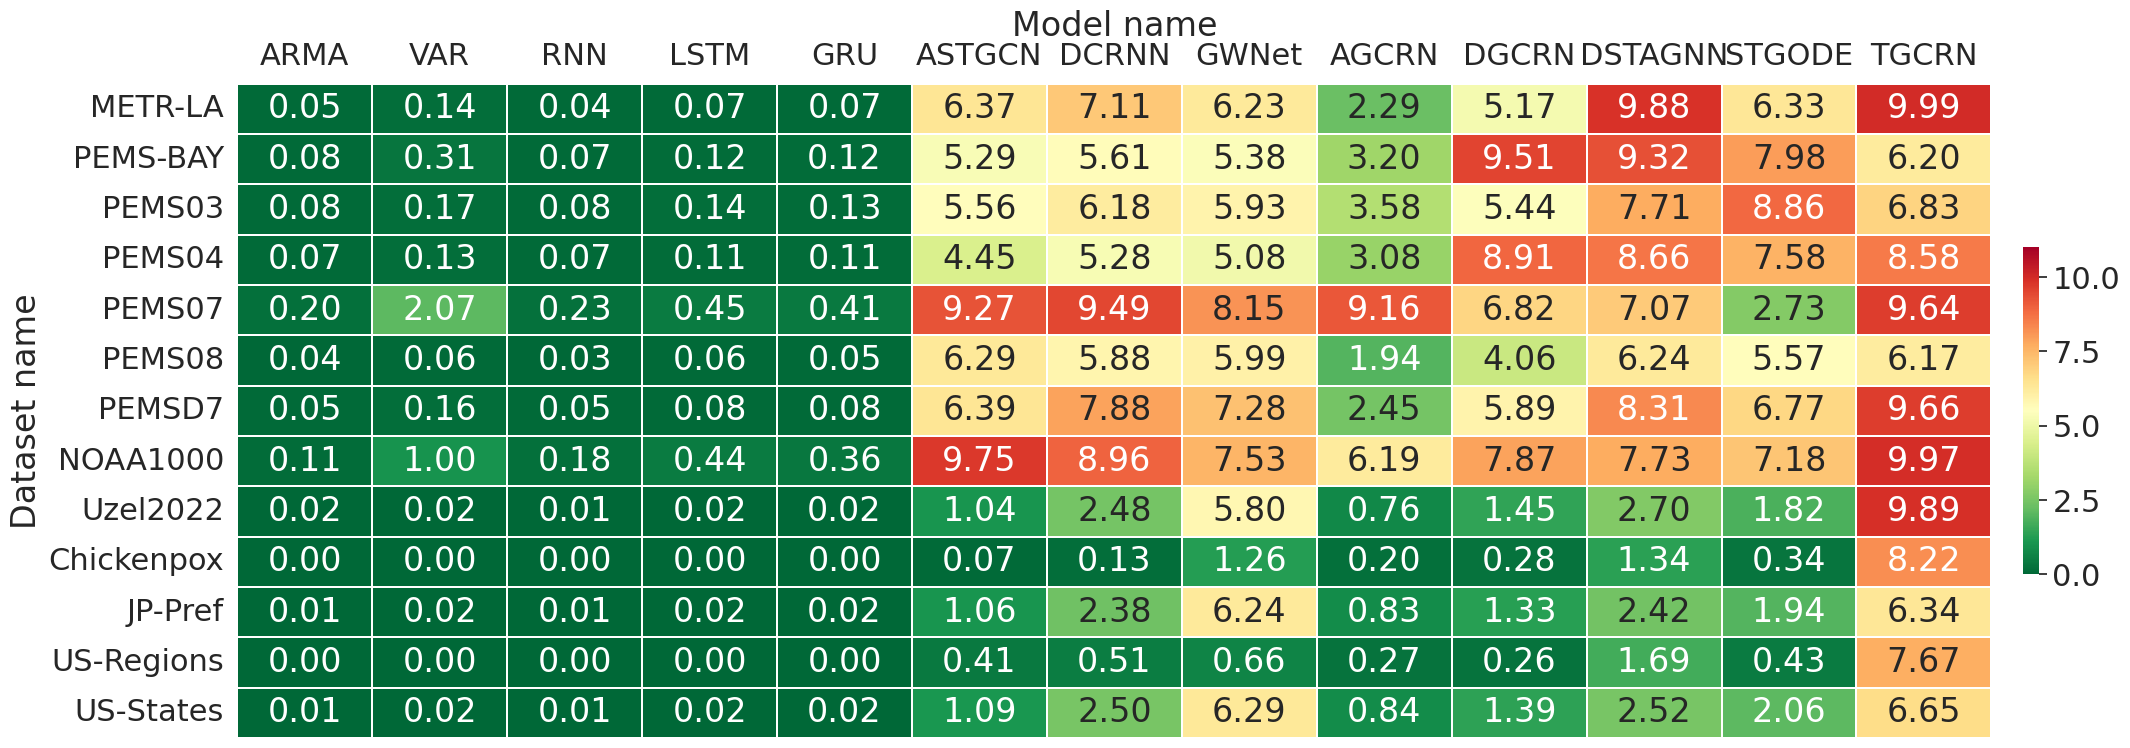

In [8]:
draw_data(extract_data(sql, 'max_memory'), vmin=0, vmax=11, save_path='./figure/02-Memory_usage_comparison.pdf')

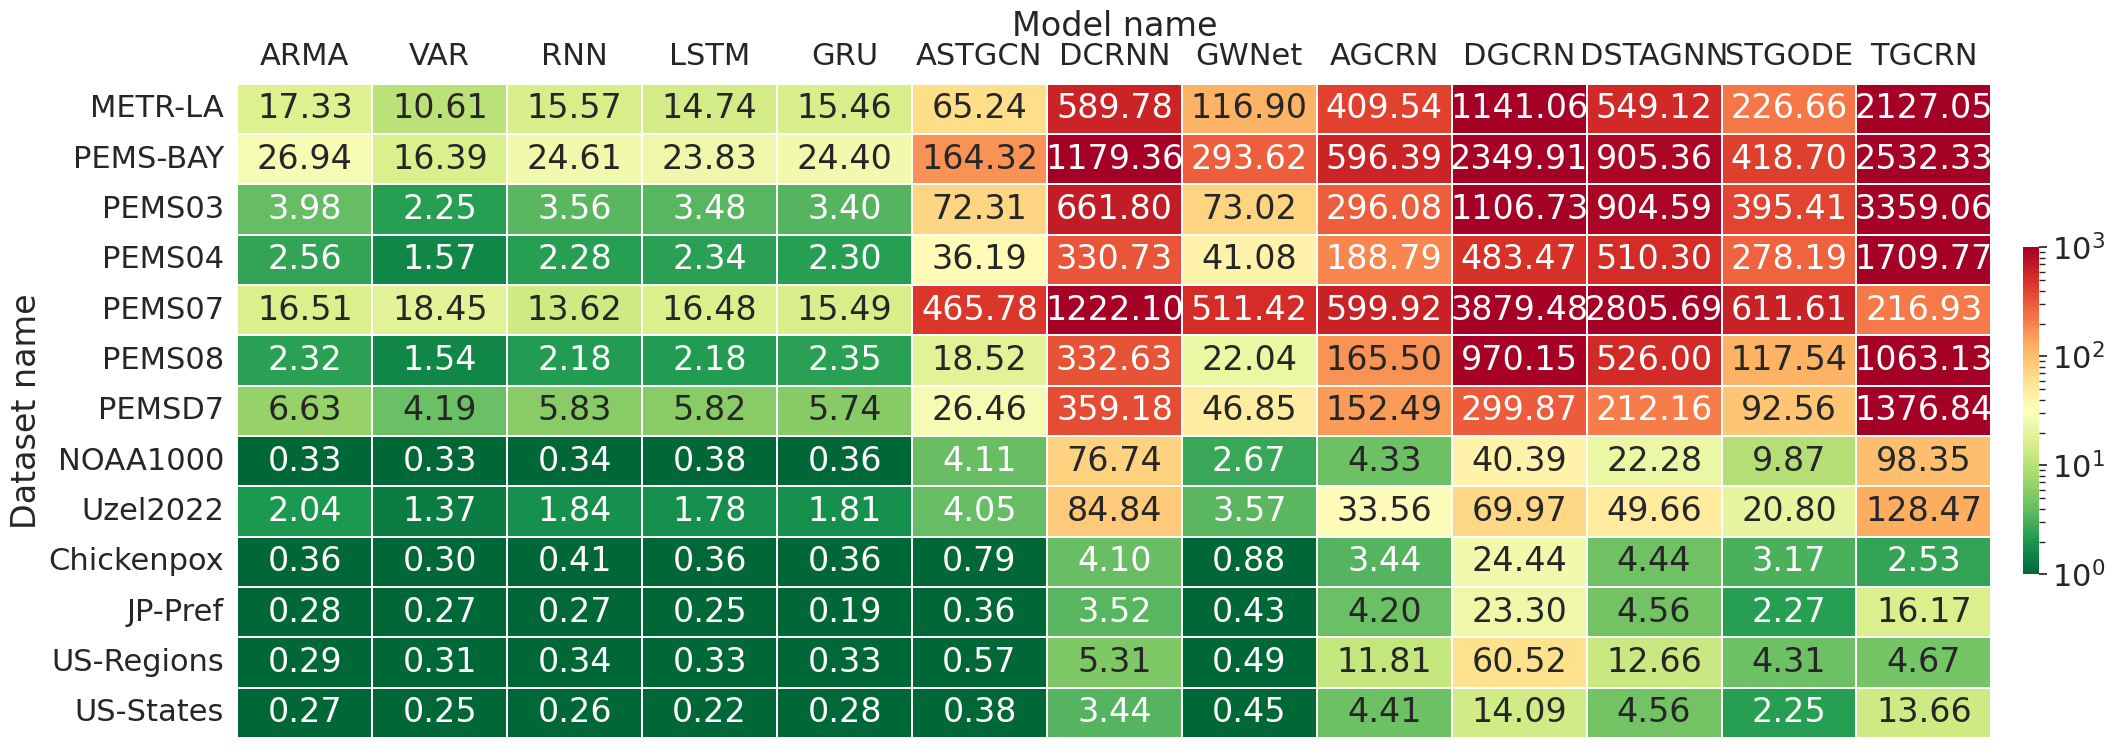

In [9]:
draw_data(extract_data(sql, 'train_time'), vmin=0, vmax=1000, logscale=True, save_path='./figure/03-Training_time_comparison.pdf')